 # Hepatocellular Carcinoma Data Science Project

### Importing Libraries

In [442]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#### Read DataSet 

In [443]:
df = pd.read_csv("hcc_dataset.csv")

In [444]:
df.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,Lives


In [445]:
# Number of rows and columns 
df.shape

(165, 50)

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          165 non-null    object
 1   Symptoms        165 non-null    object
 2   Alcohol         165 non-null    object
 3   HBsAg           165 non-null    object
 4   HBeAg           165 non-null    object
 5   HBcAb           165 non-null    object
 6   HCVAb           165 non-null    object
 7   Cirrhosis       165 non-null    object
 8   Endemic         165 non-null    object
 9   Smoking         165 non-null    object
 10  Diabetes        165 non-null    object
 11  Obesity         165 non-null    object
 12  Hemochro        165 non-null    object
 13  AHT             165 non-null    object
 14  CRI             165 non-null    object
 15  HIV             165 non-null    object
 16  NASH            165 non-null    object
 17  Varices         165 non-null    object
 18  Spleno    

In [447]:
df.columns

Index(['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin', 'Class'],
      dtype='object')

### Data Exploration

In [448]:
# Missing values
(df == '?').sum()

Gender             0
Symptoms          18
Alcohol            0
HBsAg             17
HBeAg             39
HBcAb             24
HCVAb              9
Cirrhosis          0
Endemic           39
Smoking           41
Diabetes           3
Obesity           10
Hemochro          23
AHT                3
CRI                2
HIV               14
NASH              22
Varices           52
Spleno            15
PHT               11
PVT                3
Metastasis         4
Hallmark           2
Age                0
Grams_day         48
Packs_year        53
PS                 0
Encephalopathy     1
Ascites            2
INR                4
AFP                8
Hemoglobin         3
MCV                3
Leucocytes         3
Platelets          3
 Albumin           6
Total_Bil          5
ALT                4
AST                3
GGT                3
ALP                3
TP                11
Creatinine         7
Nodules            2
Major_Dim         20
Dir_Bil           44
Iron              79
Sat          

In [449]:
# NaN values
df.isnull().sum()

Gender              0
Symptoms            0
Alcohol             0
HBsAg               0
HBeAg               0
HBcAb               0
HCVAb               0
Cirrhosis           0
Endemic             0
Smoking             0
Diabetes            0
Obesity             0
Hemochro            0
AHT                 0
CRI                 0
HIV                 0
NASH                0
Varices             0
Spleno              0
PHT                 0
PVT                 0
Metastasis          0
Hallmark            0
Age                 0
Grams_day           0
Packs_year          0
PS                  0
Encephalopathy    142
Ascites           109
INR                 0
AFP                 0
Hemoglobin          0
MCV                 0
Leucocytes          0
Platelets           0
 Albumin            0
Total_Bil           0
ALT                 0
AST                 0
GGT                 0
ALP                 0
TP                  0
Creatinine          0
Nodules             0
Major_Dim           0
Dir_Bil   

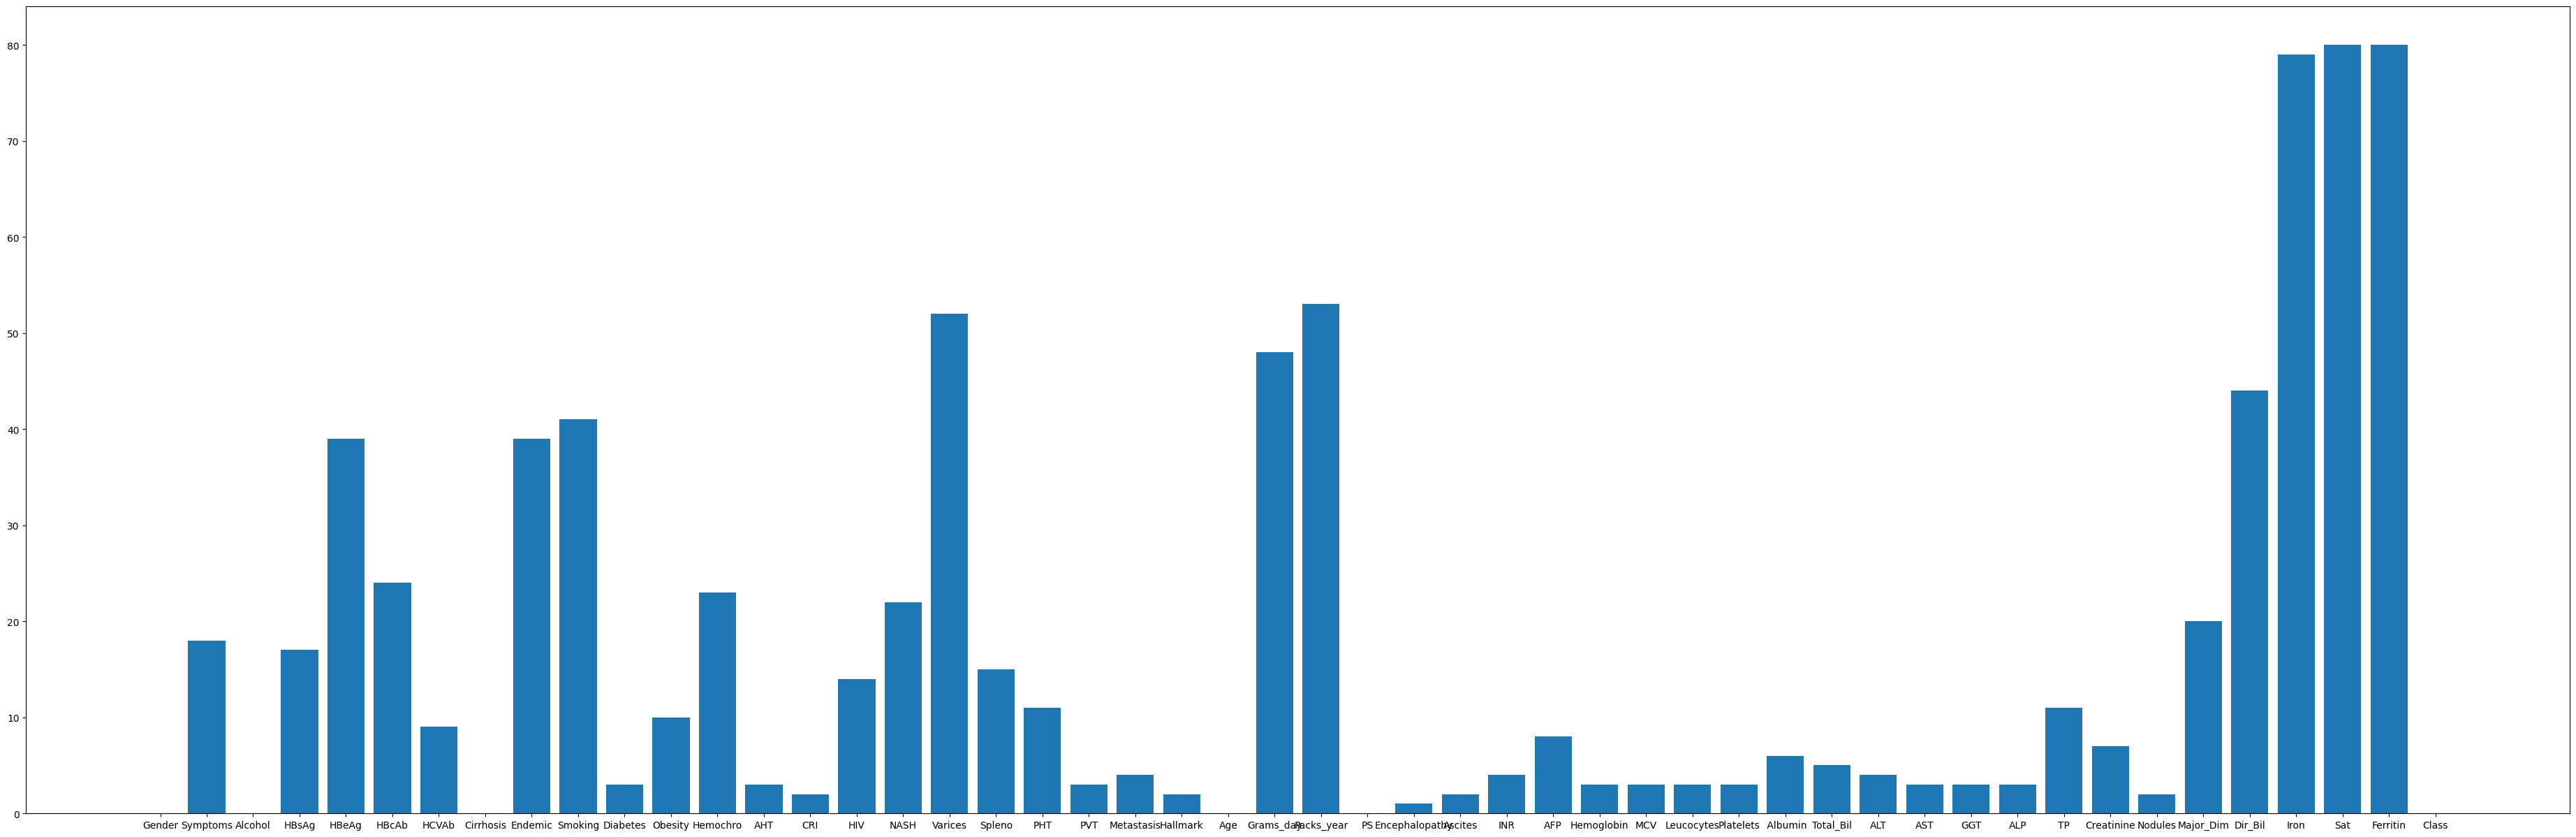

In [450]:
# Missing Values plot

dict = {}
for feature in df.columns:
    dict[feature] = (df[feature] == '?').sum()
x = list(dict.keys())
y = list(dict.values())
fig = plt.figure(figsize = (47, 15))
plt.bar(x, y)
plt.show()

In [451]:
# Percentage of missing values

missing_values_count = (df == '?').sum()

# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
percent_missing

10.012121212121212

In [452]:
# Distribution of the results
df['Class'].value_counts()

Class
Lives    102
Dies      63
Name: count, dtype: int64

<Axes: xlabel='Encephalopathy', ylabel='count'>

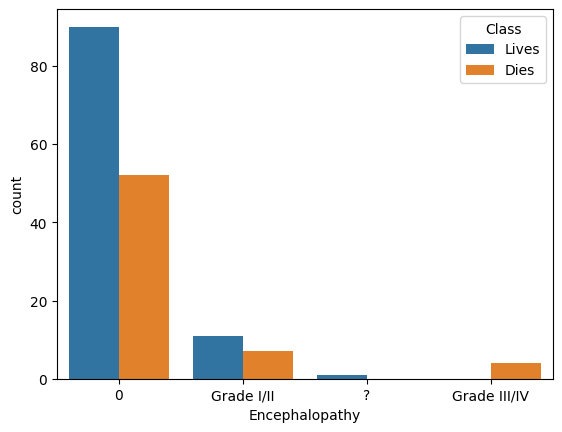

In [453]:
# NaN values to 0
df.loc[df['Encephalopathy'].isnull(), 'Encephalopathy'] = 0
sns.countplot(x='Encephalopathy', hue='Class', data=df)

<Axes: xlabel='Ascites', ylabel='count'>

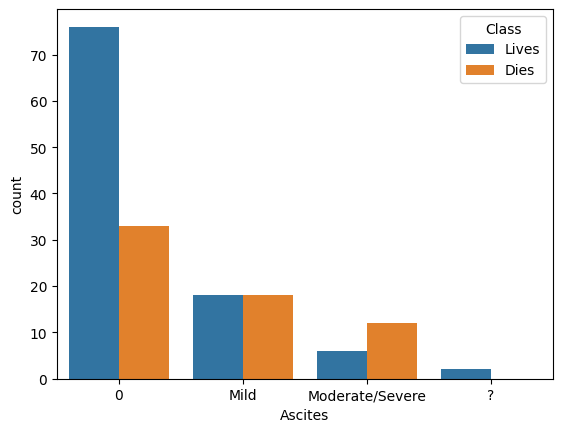

In [454]:
df.loc[df['Ascites'].isnull(), 'Ascites'] = 0
sns.countplot(x='Ascites', hue='Class', data=df)

In [455]:
# Missing values (?) become NaN
df = pd.read_csv("hcc_dataset.csv", na_values=['?'])

In [456]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,Lives
1,Female,NaN,No,No,No,No,Yes,Yes,NaN,NaN,...,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,NaN,NaN,NaN,Yes,Yes,No,Yes,...,109.0,7.6,0.70,5.0,3.0,NaN,NaN,NaN,NaN,Lives
161,Female,Yes,No,NaN,NaN,NaN,NaN,Yes,No,No,...,280.0,6.7,0.70,1.0,2.2,2.3,NaN,NaN,NaN,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,181.0,7.5,1.46,5.0,18.6,NaN,NaN,NaN,NaN,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,170.0,8.4,0.74,5.0,18.0,NaN,NaN,NaN,NaN,Dies


### Pre Processing numerical features

In [457]:
# Numerical Features normalization [0,1]

def min_max(df, feature):
    new = (df[feature] - df[feature].min()) / (df[feature].max()-df[feature].min())
    return new

In [458]:
# Get the features of numerical type

numerical_features =[]
for feature in df.columns:
    if df[feature].dtype == int or df[feature].dtype == float:
        numerical_features.append(feature)

numerical_features

['Grams_day',
 'Packs_year',
 'INR',
 'AFP',
 'Hemoglobin',
 'MCV',
 'Leucocytes',
 'Platelets',
 ' Albumin',
 'Total_Bil',
 'ALT',
 'AST',
 'GGT',
 'ALP',
 'TP',
 'Creatinine',
 'Nodules',
 'Major_Dim',
 'Dir_Bil',
 'Iron',
 'Sat',
 'Ferritin']

In [459]:
for feature in numerical_features:
    df[feature] = min_max(df, feature)

#### Outliers Analysis

In [460]:
def count_outliers_iqr(df, columns):
    outliers_by_row = [0] * df.shape[0]
    for id in range(df.shape[0]):
        for column in columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            if df.iloc[id][column] <= lower_bound or df.iloc[id][column] >= upper_bound:
                outliers_by_row[id] += 1
    return outliers_by_row

outliers_count = count_outliers_iqr(df, numerical_features)
print(outliers_count)

[0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 2, 2, 1, 0, 5, 3, 1, 1, 2, 0, 1, 2, 0, 2, 0, 3, 2, 0, 3, 1, 0, 2, 0, 2, 1, 0, 0, 1, 0, 5, 3, 0, 2, 1, 0, 1, 5, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 4, 1, 4, 0, 6, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 2, 3, 0, 0, 1, 2, 1, 1, 0, 0, 0, 4, 2, 4, 1, 6, 2, 1, 3, 4, 2, 1, 0, 2, 0, 0, 1, 1, 2, 6, 2, 1, 4, 1, 3, 0, 1, 2, 0, 1, 1, 0, 0, 4, 1, 3, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 4, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 5, 4]


In [461]:
# Printing patients data with more than 4 outliers

index_most_outliers = []
for index in range(len(outliers_count)):
    if outliers_count[index] >= 4:
        index_most_outliers.append(index)
outliers_data = df.iloc[index_most_outliers]
outliers_data

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
22,Male,Yes,Yes,No,No,Yes,No,Yes,NaN,No,...,0.572912,0.663609,0.127027,1.0,0.112195,0.013699,0.500000,0.579365,0.448879,Dies
47,Male,Yes,Yes,No,No,No,No,Yes,No,NaN,...,0.606629,0.033639,0.079730,0.2,0.039024,0.136986,0.281250,0.269841,0.398206,Dies
54,Male,Yes,Yes,No,No,No,Yes,Yes,NaN,Yes,...,0.404324,0.028542,0.083784,0.2,0.029268,0.184932,0.250000,0.214286,0.332735,Dies
71,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,0.424759,0.026504,0.059459,1.0,0.658537,0.034247,NaN,NaN,NaN,Lives
73,Male,Yes,Yes,No,No,No,No,Yes,No,No,...,0.697564,0.032620,0.082432,1.0,NaN,NaN,NaN,NaN,NaN,Dies
75,Male,Yes,Yes,No,NaN,NaN,Yes,Yes,NaN,NaN,...,0.176475,NaN,0.106757,0.2,0.297561,0.154110,0.794643,0.714286,0.430493,Dies
99,Male,No,Yes,No,NaN,No,No,Yes,No,No,...,0.066127,0.022426,0.135135,1.0,0.268293,0.184932,NaN,NaN,NaN,Lives
101,Male,Yes,No,No,No,No,Yes,Yes,No,NaN,...,0.266389,0.030581,0.135135,1.0,0.121951,0.664384,0.540179,0.214286,0.335874,Dies
103,Male,Yes,No,Yes,NaN,NaN,Yes,Yes,NaN,NaN,...,0.683260,0.024465,0.624324,1.0,NaN,1.000000,NaN,NaN,NaN,Dies
107,Male,Yes,Yes,No,No,No,No,Yes,No,No,...,0.086562,0.024465,0.335135,0.2,0.414634,NaN,0.040179,0.023810,0.219731,Dies


In [462]:
# Patients with more than 4 outliers 'Class' distribution

outliers_data['Class'].value_counts()

Class
Dies     12
Lives     4
Name: count, dtype: int64

In [463]:
df['Outliers'] = outliers_count
df['Outliers']

0      0
1      0
2      1
3      1
4      2
      ..
160    0
161    1
162    1
163    5
164    4
Name: Outliers, Length: 165, dtype: int64

<Axes: xlabel='Outliers', ylabel='count'>

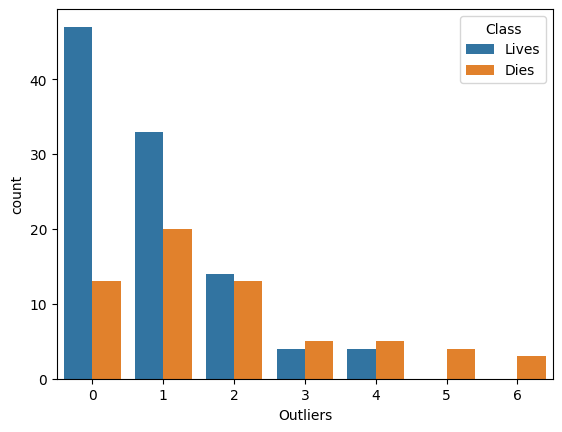

In [464]:
sns.countplot(x='Outliers', hue='Class', data=df)

<Axes: xlabel='Diabetes', ylabel='count'>

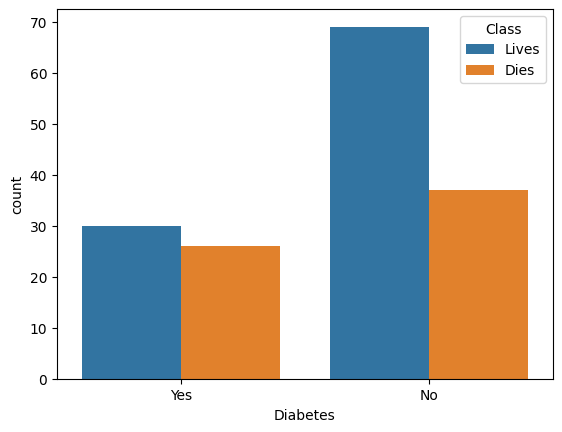

In [465]:
sns.countplot(x='Diabetes', hue='Class', data=df)

<Axes: xlabel='PS', ylabel='count'>

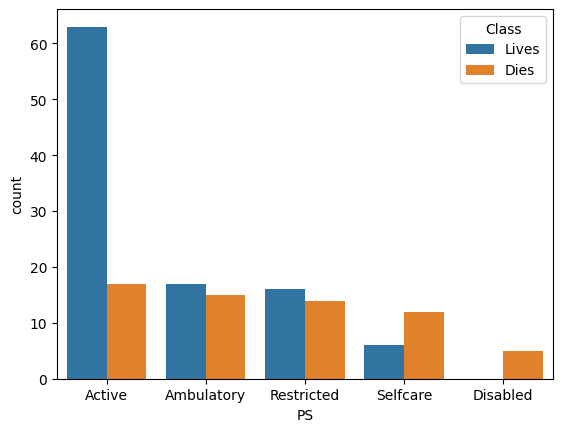

In [466]:
sns.countplot(x='PS', hue='Class', data=df)

<Axes: xlabel='Class', ylabel='Age'>

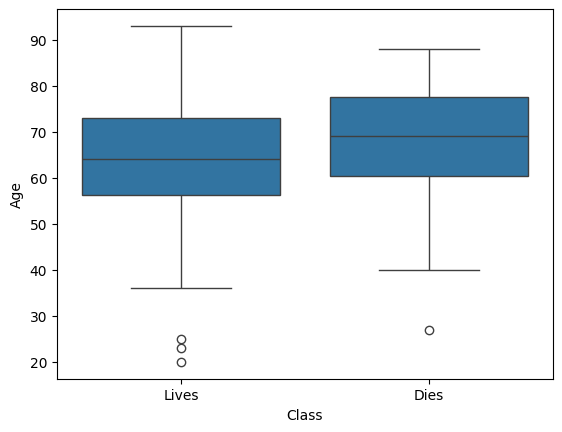

In [467]:
sns.boxplot(x='Class', y='Age', data=df)

<Axes: xlabel='Hemoglobin', ylabel='ALP'>

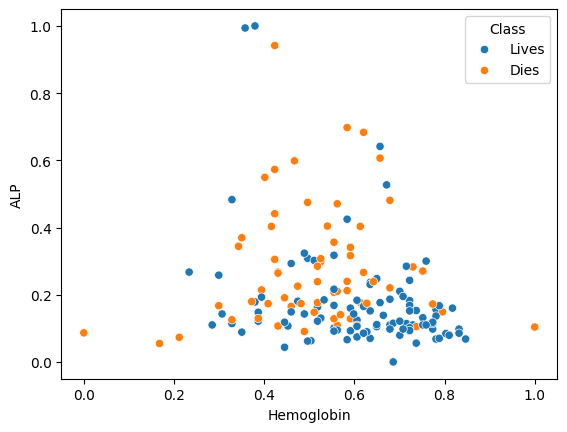

In [468]:
sns.scatterplot(x=df['Hemoglobin'], y=df['ALP'], hue=df['Class'])

### Pre Processing categorical features

In [469]:
from sklearn.preprocessing import LabelEncoder
df.replace({'Male': 0, 'Female': 1, 'No': 0, 'Yes': 1, 'Active': 0, 'Ambulatory': 1,'Restricted': 2, 'Selfcare': 3, 'Disabled': 4, 'Grade I/II': 1, 'Grade III/IV': 2, 'Mild': 1, 'Moderate/Severe': 2}, inplace=True)

df.loc[df['Ascites'].isnull(), 'Ascites'] = 0
df.loc[df['Encephalopathy'].isnull(), 'Encephalopathy'] = 0

enc = LabelEncoder()
df['Class'] = enc.fit_transform(df['Class'])

C:\Users\pedro\AppData\Local\Temp\ipykernel_2220\1767240953.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Male': 0, 'Female': 1, 'No': 0, 'Yes': 1, 'Active': 0, 'Ambulatory': 1,'Restricted': 2, 'Selfcare': 3, 'Disabled': 4, 'Grade I/II': 1, 'Grade III/IV': 2, 'Mild': 1, 'Moderate/Severe': 2}, inplace=True)


#### Feature Selection

<BarContainer object of 50 artists>

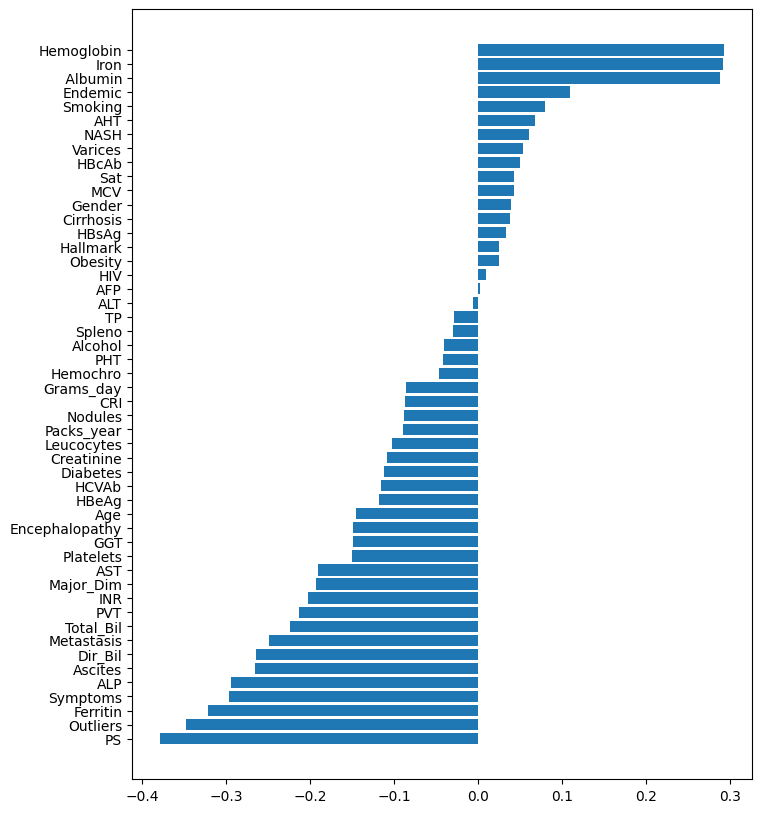

In [470]:
# Point-biserial correlation coefficient
corr_features = {}

for feature in df.columns:
    if feature != 'Class':
        temp = df.loc[df[feature].notnull(), [feature, 'Class']]
        r_pb, p_value = stats.pointbiserialr(temp[feature], temp['Class'])
        corr_features[feature] = r_pb

corr_features = {key: val for key, val in sorted(corr_features.items(), key = lambda ele: ele[1])}

plt.figure(dpi=100, figsize=(8, 10))
plt.barh(list(corr_features.keys()), list(corr_features.values()))

In [471]:
# 13 features with the best Point-biserial correlation coefficient

corr_features = {key: abs(value) for key, value in corr_features.items()}
corr_features = {key: val for key, val in sorted(corr_features.items(), key = lambda ele: ele[1])}

best_features = list(corr_features.keys())[-13::]
best_features

['PVT',
 'Total_Bil',
 'Metastasis',
 'Dir_Bil',
 'Ascites',
 ' Albumin',
 'Iron',
 'Hemoglobin',
 'ALP',
 'Symptoms',
 'Ferritin',
 'Outliers',
 'PS']

In [472]:
X = df[best_features]
X

,PVT,Total_Bil,Metastasis,Dir_Bil,Ascites,Albumin,Iron,Hemoglobin,ALP,Symptoms,Ferritin,Outliers,PS
0,0.0,0.044776,0.0,0.013699,0.0,0.500000,NaN,0.635036,0.151954,0.0,NaN,0,0
1,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,0.0,0.002488,1.0,0.000000,1.0,0.466667,0.125000,0.284672,0.110062,0.0,0.007175,1,1
3,0.0,0.002488,1.0,0.003425,0.0,0.600000,NaN,0.613139,0.176475,1.0,NaN,1,0
4,0.0,0.009950,0.0,NaN,0.0,0.733333,0.263393,0.678832,0.110062,1.0,0.009865,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.0,0.004975,0.0,NaN,0.0,0.900000,NaN,0.759124,0.110062,0.0,NaN,0,0
161,0.0,0.082090,0.0,0.075342,0.0,0.366667,NaN,0.518248,0.284780,1.0,NaN,1,1
162,0.0,0.007463,0.0,NaN,0.0,0.800000,NaN,0.605839,0.183628,0.0,NaN,1,0
163,1.0,0.019900,1.0,NaN,0.0,0.966667,NaN,0.773723,0.172388,0.0,NaN,5,1


In [473]:
X.isnull().sum()

PVT            3
Total_Bil      5
Metastasis     4
Dir_Bil       44
Ascites        0
 Albumin       6
Iron          79
Hemoglobin     3
ALP            3
Symptoms      18
Ferritin      80
Outliers       0
PS             0
dtype: int64

In [474]:
# Remove features with the most missing values
best_features.remove('Dir_Bil')
best_features.remove('Iron')
best_features.remove('Ferritin')
best_features.remove('Outliers')

X = X[best_features]
X

,PVT,Total_Bil,Metastasis,Ascites,Albumin,Hemoglobin,ALP,Symptoms,PS
0,0.0,0.044776,0.0,0.0,0.500000,0.635036,0.151954,0.0,0
1,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0
2,0.0,0.002488,1.0,1.0,0.466667,0.284672,0.110062,0.0,1
3,0.0,0.002488,1.0,0.0,0.600000,0.613139,0.176475,1.0,0
4,0.0,0.009950,0.0,0.0,0.733333,0.678832,0.110062,1.0,0
...,...,...,...,...,...,...,...,...,...
160,0.0,0.004975,0.0,0.0,0.900000,0.759124,0.110062,0.0,0
161,0.0,0.082090,0.0,0.0,0.366667,0.518248,0.284780,1.0,1
162,0.0,0.007463,0.0,0.0,0.800000,0.605839,0.183628,0.0,0
163,1.0,0.019900,1.0,0.0,0.966667,0.773723,0.172388,0.0,1


In [475]:
df['Class'] = enc.inverse_transform(df['Class'])
y = df['Class']
y

0      Lives
1      Lives
2      Lives
3       Dies
4      Lives
       ...  
160    Lives
161     Dies
162    Lives
163     Dies
164     Dies
Name: Class, Length: 165, dtype: object

### Imputation of missing values

In [476]:
for var in ['Symptoms', 'PVT', 'Metastasis']:
    X.loc[X[var].isnull(), var] = 0

In [477]:
X.describe()

,PVT,Total_Bil,Metastasis,Ascites,Albumin,Hemoglobin,ALP,Symptoms,PS
count,165.000000,160.000000,165.000000,165.000000,159.000000,162.000000,162.000000,165.000000,165.000000
mean,0.218182,0.069352,0.218182,0.436364,0.515178,0.575110,0.215518,0.569697,1.006061
std,0.414269,0.136800,0.414269,0.683346,0.228377,0.156587,0.171595,0.496626,1.176482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.012438,0.000000,0.000000,0.366667,0.468978,0.109296,0.000000,0.000000
50%,0.000000,0.027363,0.000000,0.000000,0.500000,0.587591,0.164214,1.000000,1.000000
75%,0.000000,0.065299,0.000000,1.000000,0.716667,0.700730,0.265878,1.000000,2.000000
max,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000


#### KNN Imputer

In [478]:
# NaN values aproximated to the nearest neighbors
from sklearn.impute import KNNImputer

for var in ['Total_Bil', 'Metastasis',	' Albumin', 'Hemoglobin', 'ALP']:
    column_data = X[[var]].values
    imputer = KNNImputer(n_neighbors=3)
    imputed_column = imputer.fit_transform(column_data)
    X[var] = imputed_column

C:\Users\pedro\AppData\Local\Temp\ipykernel_2220\3361667728.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var] = imputed_column
C:\Users\pedro\AppData\Local\Temp\ipykernel_2220\3361667728.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var] = imputed_column
C:\Users\pedro\AppData\Local\Temp\ipykernel_2220\3361667728.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [479]:
X

,PVT,Total_Bil,Metastasis,Ascites,Albumin,Hemoglobin,ALP,Symptoms,PS
0,0.0,0.044776,0.0,0.0,0.500000,0.635036,0.151954,0.0,0
1,0.0,0.069352,0.0,0.0,0.515178,0.575110,0.215518,0.0,0
2,0.0,0.002488,1.0,1.0,0.466667,0.284672,0.110062,0.0,1
3,0.0,0.002488,1.0,0.0,0.600000,0.613139,0.176475,1.0,0
4,0.0,0.009950,0.0,0.0,0.733333,0.678832,0.110062,1.0,0
...,...,...,...,...,...,...,...,...,...
160,0.0,0.004975,0.0,0.0,0.900000,0.759124,0.110062,0.0,0
161,0.0,0.082090,0.0,0.0,0.366667,0.518248,0.284780,1.0,1
162,0.0,0.007463,0.0,0.0,0.800000,0.605839,0.183628,0.0,0
163,1.0,0.019900,1.0,0.0,0.966667,0.773723,0.172388,0.0,1


### Train and Test Split

In [480]:
from sklearn.model_selection import train_test_split

y = df['Class']

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)

### KNN Classifier

In [481]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_X, train_y)

neigh.score(test_X, test_y)

0.72

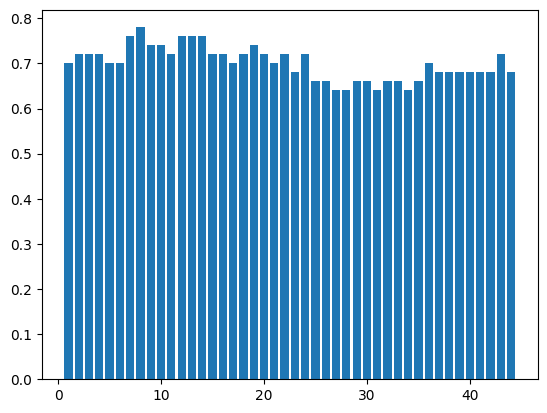

In [482]:
# Impact of the number of neighbors in the model
best_n = None
best_score = 0
num_neigh = []
accuracy = []
for n in range(1, 45):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))
    num_neigh.append(n)
    if model.score(test_X, test_y) > best_score:
        best_n = n
        best_score = model.score(test_X, test_y)


plt.bar(num_neigh,accuracy)
plt.show()


In [483]:
print("Best n_neighbors: ", best_n)
print("Score: ", best_score)

Best n_neighbors:  8
Score:  0.78


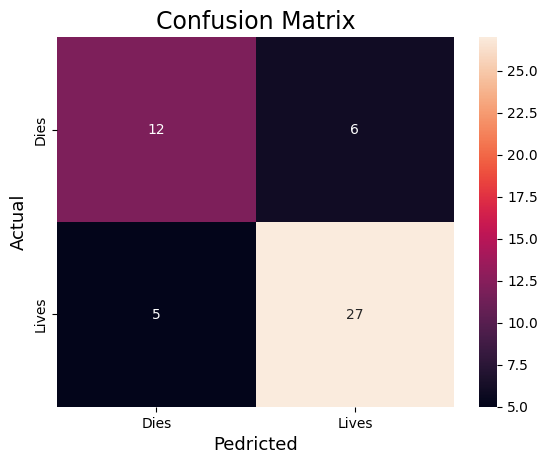

In [484]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

neigh = KNeighborsClassifier(n_neighbors=best_n)
neigh.fit(train_X, train_y)

predicted = neigh.predict(test_X)
actual = test_y

cm = confusion_matrix(actual,predicted)

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Dies','Lives'],
            yticklabels=['Dies','Lives'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Pedricted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

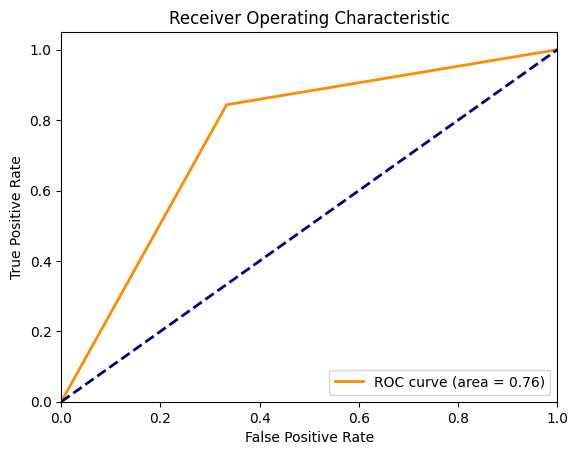

<Figure size 800x1000 with 0 Axes>

In [485]:
dict = {'Dies': 0, 'Lives': 1}

predicted_new = [dict[x] for x in predicted]
actual_new = [dict[x] for x in actual]

fpr, tpr, thresholds = roc_curve(actual_new, predicted_new)
roc_auc = auc(fpr, tpr)



plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.figure(dpi=100, figsize=(8, 10))
plt.show()

In [486]:
# Preview of the model

print(neigh.predict(X.head()))
print(neigh.predict_proba(X.head()))

['Lives' 'Lives' 'Lives' 'Lives' 'Lives']
[[0.    1.   ]
 [0.    1.   ]
 [0.375 0.625]
 [0.25  0.75 ]
 [0.    1.   ]]


### Decision Tree Classifier

In [503]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(train_X, train_y)
model.score(test_X, test_y)

0.68

In [504]:
# Preview of the model

print("Making predictions for the following 5 patients:")
print(X.head())
print("The predictions are")
print(model.predict(X.head()))

Making predictions for the following 5 patients:
   PVT  Total_Bil  Metastasis  Ascites   Albumin  Hemoglobin       ALP  \
0  0.0   0.044776         0.0      0.0  0.500000    0.635036  0.151954   
1  0.0   0.069352         0.0      0.0  0.515178    0.575110  0.215518   
2  0.0   0.002488         1.0      1.0  0.466667    0.284672  0.110062   
3  0.0   0.002488         1.0      0.0  0.600000    0.613139  0.176475   
4  0.0   0.009950         0.0      0.0  0.733333    0.678832  0.110062   

   Symptoms  PS  
0       0.0   0  
1       0.0   0  
2       0.0   1  
3       1.0   0  
4       1.0   0  
The predictions are
['Lives' 'Lives' 'Lives' 'Dies' 'Lives']


(array([357.,   0.,   0.,   0.,   0., 509.,   0.,   0.,   0., 134.]),
 array([0.64 , 0.644, 0.648, 0.652, 0.656, 0.66 , 0.664, 0.668, 0.672,
        0.676, 0.68 ]),
 <BarContainer object of 10 artists>)

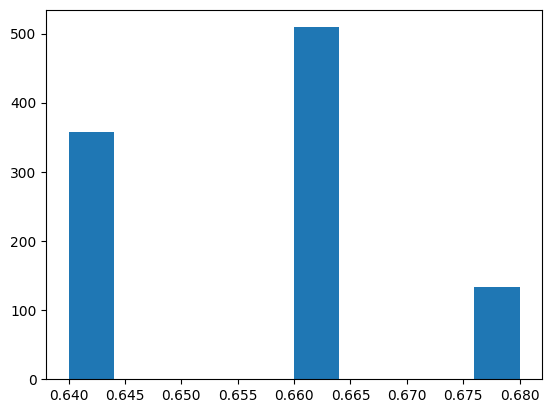

In [505]:
# Analysis of the model's performance

model_accuracies = []

for repetition in range(1000):
    model = DecisionTreeClassifier()
    model.fit(train_X, train_y)
    model_accuracy = model.score(test_X, test_y)
    model_accuracies.append(model_accuracy)
    
plt.hist(model_accuracies)

In [521]:
# Tree size impact

from sklearn.metrics import accuracy_score

def get_acc(max_leaf_nodes, train_X, test_X, train_y, test_y):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=5)
    model.fit(train_X, train_y)
    preds_test = model.predict(test_X)
    acc = accuracy_score(test_y, preds_test)
    return(acc)

for max_leaf_nodes in [2, 4, 6, 8, 10, 12, 14, 16]:
    my_acc = get_acc(max_leaf_nodes, train_X, test_X, train_y, test_y)
    print("Max leaf nodes: %d  \t\t Accuracy score:  %f" %(max_leaf_nodes, my_acc))

Max leaf nodes: 2  		 Accuracy score:  0.600000
Max leaf nodes: 4  		 Accuracy score:  0.640000
Max leaf nodes: 6  		 Accuracy score:  0.700000
Max leaf nodes: 8  		 Accuracy score:  0.700000
Max leaf nodes: 10  		 Accuracy score:  0.700000
Max leaf nodes: 12  		 Accuracy score:  0.700000
Max leaf nodes: 14  		 Accuracy score:  0.700000
Max leaf nodes: 16  		 Accuracy score:  0.700000


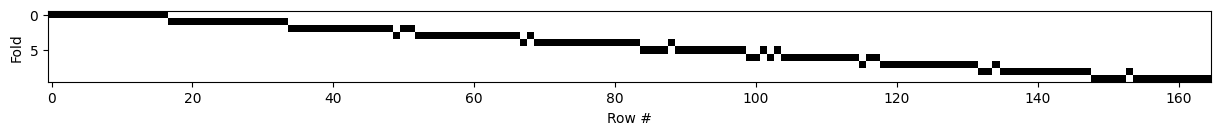

In [507]:
# Cross-Validation
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

# Cross-Validation Dataset divison
plot_cv(StratifiedKFold(n_splits=10), X, y)

Text(0.5, 1.0, 'Average score: 0.7025735294117647')

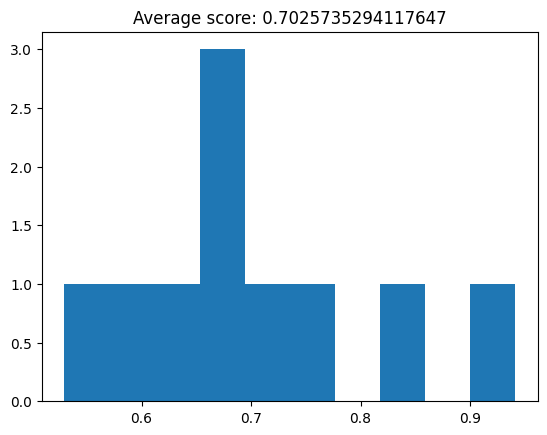

In [508]:
# Cross-validation in the accuracy

from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [509]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                  'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7209558823529412
Best parameters: {'max_depth': 4, 'max_features': 2}


Text(50.722222222222214, 0.5, 'max_depth')

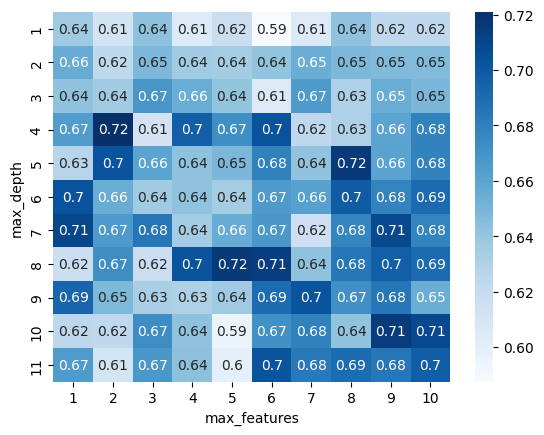

In [510]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (11, 10)
sns.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(10) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(11) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [538]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                  'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7352941176470589
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 3, 'splitter': 'best'}


In [539]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(max_depth=5, max_features=3)

In [540]:
test_y.value_counts()

Class
Lives    32
Dies     18
Name: count, dtype: int64

### Decision Tree Classifier Performance Metrics

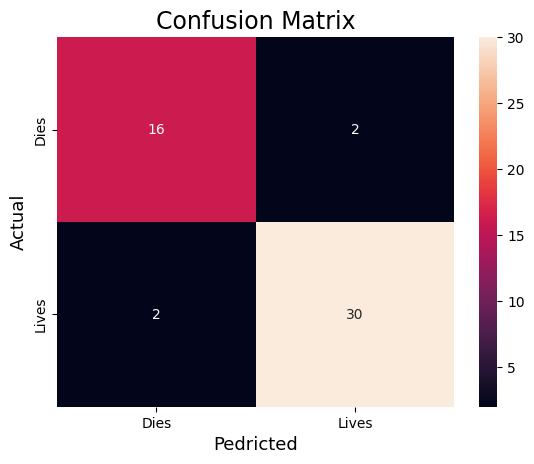

In [541]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

predicted = decision_tree_classifier.predict(test_X)
actual = test_y

cm = confusion_matrix(actual,predicted)

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Dies','Lives'],
            yticklabels=['Dies','Lives'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Pedricted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

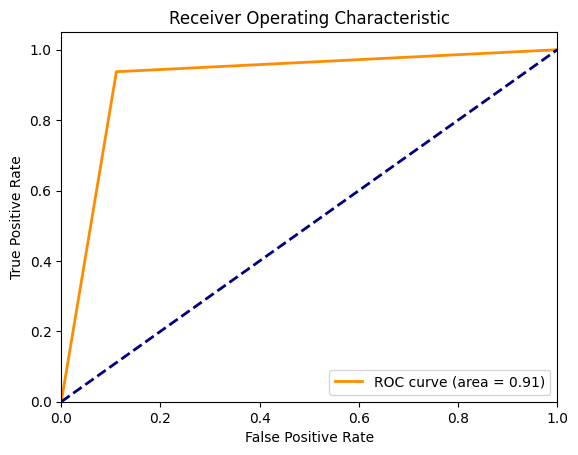

<Figure size 800x1000 with 0 Axes>

In [542]:
dict = {'Dies': 0, 'Lives': 1}

predicted_new = [dict[x] for x in predicted]
actual_new = [dict[x] for x in actual]

fpr, tpr, thresholds = roc_curve(actual_new, predicted_new)
roc_auc = auc(fpr, tpr)



plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.figure(dpi=100, figsize=(8, 10))
plt.show()


In [547]:
decision_tree_classifier.score(test_X, test_y)

0.92

In [543]:
decision_tree_classifier.predict(X.head(10))

array(['Lives', 'Lives', 'Lives', 'Dies', 'Lives', 'Dies', 'Dies', 'Dies',
       'Lives', 'Lives'], dtype=object)

In [544]:
y.head(10)

0    Lives
1    Lives
2    Lives
3     Dies
4    Lives
5     Dies
6     Dies
7     Dies
8    Lives
9    Lives
Name: Class, dtype: object

In [545]:
# Save model

import joblib
joblib.dump(decision_tree_classifier, 'model.pkl')

['model.pkl']